In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import shapely as shp
import geopandas as gpd
import math
import random
import scipy.stats as stats
from glob import glob
import os
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from functions import *

In [57]:
pal = sns.color_palette('GnBu', 5)
pal

[(0.8535178777393311, 0.9429757785467128, 0.8314186851211073),
 (0.7058823529411765, 0.8849673202614379, 0.7307189542483661),
 (0.4795847750865052, 0.7984621299500193, 0.7695501730103806),
 (0.2601307189542484, 0.6509803921568628, 0.7999999999999999),
 (0.07497116493656286, 0.4526874279123414, 0.6969319492502883)]

In [31]:
'''Import Data'''
path = './modeloutput/sensitivity-tests/' # use your path
all_files = glob(os.path.join(path , "sensitivitysimulation-sddist-meandbh-*-pCon0.csv"))

li = []

#import  all
for filename in all_files:
    df = pd.read_csv(filename, index_col = 0, header=0)
    li.append(df)

#concat
modDat_0pCon = pd.concat(li, axis=0, ignore_index=True)

In [32]:
all_files = glob(os.path.join(path , "sensitivitysimulation-sddist-meandbh-*-pCon0.5.csv"))

li = []

#import  all
for filename in all_files:
    df = pd.read_csv(filename, index_col = 0, header=0)
    li.append(df)

#concat
modDat_05pCon = pd.concat(li, axis=0, ignore_index=True)

In [34]:
all_files = glob(os.path.join(path , "sensitivitysimulation-sddist-meandbh-*-pCon1.csv"))

li = []

#import  all
for filename in all_files:
    df = pd.read_csv(filename, index_col = 0, header=0)
    li.append(df)

#concat
modDat_1pCon = pd.concat(li, axis=0, ignore_index=True)

In [47]:
modDat_1pCon

,pCon,distMu,distSigma,dbhMu,dbhSigma,iteration,pOverlap,pCoverage,totalArea,LAIModelled,SDModelled
0,1,4,0.759213,32.647521,1,0,0.160819,0.363330,115.535885,2.417188,16.231043
1,1,4,0.759213,32.647521,1,1,0.137435,0.359700,112.940425,2.160266,16.583205
2,1,4,0.759213,32.647521,1,2,0.138541,0.378741,115.159506,2.172425,16.566537
3,1,4,0.759213,32.647521,1,3,0.155373,0.384874,117.525356,2.357356,16.313055
4,1,4,0.759213,32.647521,1,4,0.157899,0.381434,113.191193,2.385103,16.275022
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,4,2.009404,1.561321,1,95,0.000000,0.037465,7.520752,0.650300,18.652900
9996,1,4,2.009404,1.561321,1,96,0.000000,0.033075,6.639494,0.650300,18.652900
9997,1,4,2.009404,1.561321,1,97,0.000000,0.033723,6.769598,0.650300,18.652900
9998,1,4,2.009404,1.561321,1,98,0.000000,0.029058,5.905973,0.650300,18.652900


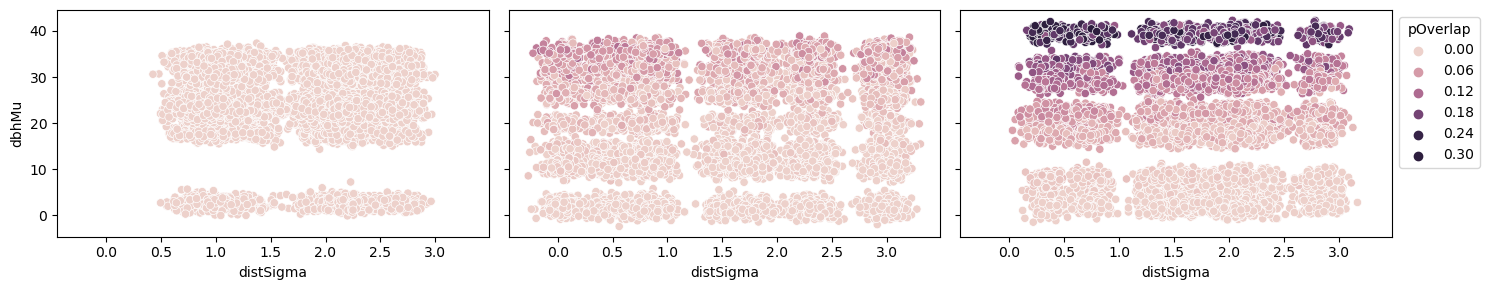

In [38]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (15, 3), 
                            sharex = True, 
                            sharey = True, 
                            layout = 'tight')

sns.scatterplot(x = jitter(modDat_0pCon.distSigma, 0.1), y = jitter(modDat_0pCon.dbhMu, 1), 
                hue = modDat_0pCon.pOverlap,
                hue_norm = (0, 0.25),
                legend = False, 
                ax = ax1)

sns.scatterplot(x = jitter(modDat_05pCon.distSigma, 0.1), y = jitter(modDat_05pCon.dbhMu, 1), 
                hue = modDat_05pCon.pOverlap,
                hue_norm = (0, 0.25),
                legend = False, 
                ax = ax2)

sns.scatterplot(x = jitter(modDat_1pCon.distSigma, 0.1), y = jitter(modDat_1pCon.dbhMu, 1), 
                hue = modDat_1pCon.pOverlap,
                hue_norm = (0, 0.25),
                ax = ax3)

ax3.legend(title = 'pOverlap', bbox_to_anchor = (1, 1))


In [81]:
#Calculate lai and snowdepth (low snow year) from modelled overlap values
modDat_1pCon['LAIModelled'] = 0.6503 + 10.9868*modDat_1pCon['pOverlap']
modDat_1pCon['SDModelled'] = 18.6529 - 15.0595*modDat_1pCon['pOverlap']

modDat_05pCon['LAIModelled'] = 0.6503 + 10.9868*modDat_05pCon['pOverlap']
modDat_05pCon['SDModelled'] = 18.6529 - 15.0595*modDat_05pCon['pOverlap']

modDat_0pCon['LAIModelled'] = 0.6503 + 10.9868*modDat_0pCon['pOverlap']
modDat_0pCon['SDModelled'] = 18.6529 - 15.0595*modDat_0pCon['pOverlap']

#Normalize Snowdepth by LAI
modDat_1pCon['SnowModLAI'] = modDat_1pCon.SDModelled/modDat_1pCon.LAIModelled
modDat_05pCon['SnowModLAI'] = modDat_05pCon.SDModelled/modDat_05pCon.LAIModelled
modDat_0pCon['SnowModLAI'] = modDat_0pCon.SDModelled/modDat_0pCon.LAIModelled

#Normalize Snowdepth by DBH
modDat_1pCon['SnowModDBH'] = modDat_1pCon.SDModelled/modDat_1pCon.dbhMu
modDat_05pCon['SnowModDBH'] = modDat_05pCon.SDModelled/modDat_05pCon.dbhMu
modDat_0pCon['SnowModDBH'] = modDat_0pCon.SDModelled/modDat_0pCon.dbhMu

In [82]:
#Get site averages
modDat_0grouped = modDat_0pCon.groupby(['pCon', 'distMu', 'distSigma', 'dbhMu', 'dbhSigma'])[['pOverlap', 'pCoverage', 'totalArea', 'LAIModelled', 'SDModelled', 'SnowModLAI', 'SnowModDBH']].mean().reset_index()
modDat_05grouped = modDat_05pCon.groupby(['pCon', 'distMu', 'distSigma', 'dbhMu', 'dbhSigma'])[['pOverlap', 'pCoverage', 'totalArea', 'LAIModelled', 'SDModelled', 'SnowModLAI', 'SnowModDBH']].mean().reset_index()
modDat_1grouped = modDat_1pCon.groupby(['pCon', 'distMu', 'distSigma', 'dbhMu', 'dbhSigma'])[['pOverlap', 'pCoverage', 'totalArea', 'LAIModelled', 'SDModelled', 'SnowModLAI', 'SnowModDBH']].mean().reset_index()

In [83]:
modDat_0grouped.head()

,pCon,distMu,distSigma,dbhMu,dbhSigma,pOverlap,pCoverage,totalArea,LAIModelled,SDModelled,SnowModLAI,SnowModDBH
0,0,4,0.762253,2.631429,1,0.000000,0.000031,0.006275,0.650300,18.652900,28.683531,7.088506
1,0,4,0.762253,17.856237,1,0.000003,0.001247,0.250948,0.650330,18.652859,28.682144,1.044613
2,0,4,0.762253,21.938151,1,0.000010,0.001874,0.378062,0.650405,18.652757,28.678710,0.850243
3,0,4,0.762253,22.973376,1,0.000007,0.002068,0.416606,0.650376,18.652795,28.680013,0.811931
4,0,4,0.762253,23.204534,1,0.000007,0.002101,0.423260,0.650378,18.652794,28.679954,0.803843


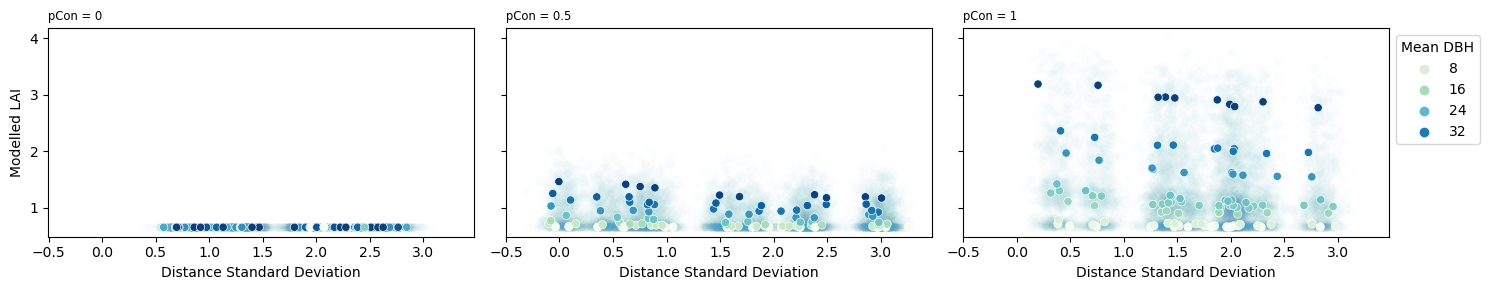

In [84]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (15, 3), 
                            sharex = True, 
                            sharey = True, 
                            layout = 'tight')

sns.scatterplot(data = modDat_0pCon, x = jitter(modDat_0pCon['distSigma'], 0.1), y = 'LAIModelled', 
                alpha = 0.01, color = pal[3],
                ax = ax1)
sns.scatterplot(data = modDat_0grouped, x = jitter(modDat_0grouped['distSigma'], 0.1), y = 'LAIModelled', 
                hue = 'dbhMu',
                palette = 'GnBu',
                legend = False,
                ax = ax1)

sns.scatterplot(data = modDat_05pCon, x = jitter(modDat_05pCon['distSigma'], 0.1), y = 'LAIModelled',
                alpha = 0.01, color = pal[3],
                ax = ax2)
sns.scatterplot(data = modDat_05grouped, x = jitter(modDat_05grouped['distSigma'], 0.1), y = 'LAIModelled', 
                hue = 'dbhMu',
                palette = 'GnBu',
                legend = False,
                ax = ax2)

sns.scatterplot(data = modDat_1pCon, x = jitter(modDat_1pCon['distSigma'], 0.1), y = 'LAIModelled', 
                alpha = 0.01,color = pal[3],
                ax = ax3)
sns.scatterplot(data = modDat_1grouped, x = jitter(modDat_1grouped['distSigma'], 0.1), y = 'LAIModelled', 
                hue = 'dbhMu',
                palette = 'GnBu',
                ax = ax3)

ax1.set_title('pCon = 0', loc = 'left', size = 'small')
ax2.set_title('pCon = 0.5', loc = 'left', size = 'small')
ax3.set_title('pCon = 1', loc = 'left', size = 'small')

ax1.set_xlabel('Distance Standard Deviation')
ax2.set_xlabel('Distance Standard Deviation')
ax3.set_xlabel('Distance Standard Deviation')
ax1.set_ylabel('Modelled LAI')

ax3.legend(title = 'Mean DBH', bbox_to_anchor = (1,1))

Text(0, 0.5, 'Normalized Snow Depth [cm]')

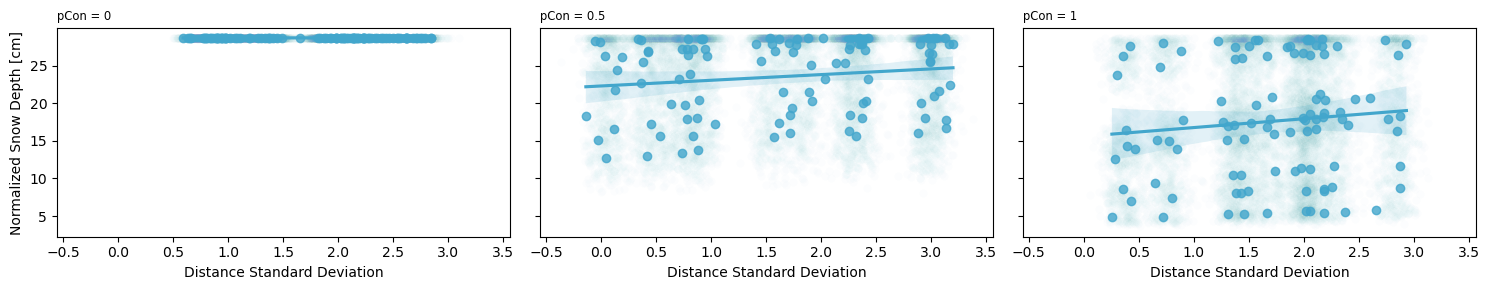

In [90]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (15, 3), 
                            sharex = True, 
                            sharey = True, 
                            layout = 'tight')

sns.scatterplot(data = modDat_0pCon, x = jitter(modDat_0pCon['distSigma'], 0.1), y = 'SnowModLAI', 
                alpha = 0.01, color = pal[3],
                ax = ax1)
sns.regplot(data = modDat_0grouped, x = jitter(modDat_0grouped['distSigma'], 0.1), y = 'SnowModLAI', 
                color = pal[3],
                ax = ax1)

sns.scatterplot(data = modDat_05pCon, x = jitter(modDat_05pCon['distSigma'], 0.1), y = 'SnowModLAI',
                alpha = 0.01, color = pal[3],
                ax = ax2)
sns.regplot(data = modDat_05grouped, x = jitter(modDat_05grouped['distSigma'], 0.1), y = 'SnowModLAI', 
                color = pal[3],
                ax = ax2)

sns.scatterplot(data = modDat_1pCon, x = jitter(modDat_1pCon['distSigma'], 0.1), y = 'SnowModLAI', 
                alpha = 0.01, color = pal[3],
                ax = ax3)
sns.regplot(data = modDat_1grouped, x = jitter(modDat_1grouped['distSigma'], 0.1), y = 'SnowModLAI', 
                color = pal[3],
                ax = ax3)

ax1.set_title('pCon = 0', loc = 'left', size = 'small')
ax2.set_title('pCon = 0.5', loc = 'left', size = 'small')
ax3.set_title('pCon = 1', loc = 'left', size = 'small')

ax1.set_xlabel('Distance Standard Deviation')
ax2.set_xlabel('Distance Standard Deviation')
ax3.set_xlabel('Distance Standard Deviation')
ax1.set_ylabel('Normalized Snow Depth [cm]')